<a href="https://colab.research.google.com/github/MK316/Workingpapers/blob/main/ksat_LD_and_Readability_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KSAT data process (as of 1005)

## Read data file from Github, Add string length, Number of splitted words (N_Splits)

data: https://raw.githubusercontent.com/MK316/Workingpapers/main/Analysis/mydata01.csv (17 items)

In [3]:
import pandas as pd

In [4]:
url = 'https://raw.githubusercontent.com/MK316/Workingpapers/main/Analysis/mydata01.csv'
df1 = pd.read_csv(url)

In [74]:
# import chardet
# with open('/content/ksatdata_item17.csv', 'rb') as f:
#   enc = chardet.detect(f.read())
# df1 = pd.read_csv('/content/ksatdata_item17.csv', encoding=enc['encoding'])

In [5]:
df1

,Year,Category,QN,Passage
0,2015,Context,Q18,One difference between winners and losers is h...
1,2015,Context,Q19,"As I walked to the train station, I felt the w..."
2,2015,Context,Q20,Many disciplines are better learned by enterin...
3,2015,Context,Q21,The most normal and competent child encounters...
4,2015,Context,Q22,The most normal and competent child encounters...
...,...,...,...,...
131,2022,Infer-Logic,Q36,"According to the market response model, it is ..."
132,2022,Infer-Logic,Q37,In spite of the likeness between the fictional...
133,2022,Infer-Logic,Q38,Retraining current employees for new positions...
134,2022,Infer-Logic,Q39,As long as the irrealism of the silent black a...


# Adding a colum with length info

In [6]:
df2 = df1

In [7]:
# Added column: String length
length = []

for i in range(0, len(df2['Passage'])):
  LEN = len(df2['Passage'][i])
  length.append(LEN)

df2['String'] = length
df2

,Year,Category,QN,Passage,String
0,2015,Context,Q18,One difference between winners and losers is h...,635
1,2015,Context,Q19,"As I walked to the train station, I felt the w...",628
2,2015,Context,Q20,Many disciplines are better learned by enterin...,715
3,2015,Context,Q21,The most normal and competent child encounters...,737
4,2015,Context,Q22,The most normal and competent child encounters...,724
...,...,...,...,...,...
131,2022,Infer-Logic,Q36,"According to the market response model, it is ...",1035
132,2022,Infer-Logic,Q37,In spite of the likeness between the fictional...,1025
133,2022,Infer-Logic,Q38,Retraining current employees for new positions...,981
134,2022,Infer-Logic,Q39,As long as the irrealism of the silent black a...,1068


In [10]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df2['Passage'])):
  TSP = df2['Passage'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df2['Splits'] = tsplit
df2['N_Splits'] = splen
df2

,Year,Category,QN,Passage,String,Splits,N_Splits
0,2015,Context,Q18,One difference between winners and losers is h...,635,"[One, difference, between, winners, and, loser...",107
1,2015,Context,Q19,"As I walked to the train station, I felt the w...",628,"[As, I, walked, to, the, train, station,, I, f...",123
2,2015,Context,Q20,Many disciplines are better learned by enterin...,715,"[Many, disciplines, are, better, learned, by, ...",117
3,2015,Context,Q21,The most normal and competent child encounters...,737,"[The, most, normal, and, competent, child, enc...",128
4,2015,Context,Q22,The most normal and competent child encounters...,724,"[The, most, normal, and, competent, child, enc...",128
...,...,...,...,...,...,...,...
131,2022,Infer-Logic,Q36,"According to the market response model, it is ...",1035,"[According, to, the, market, response, model,,...",163
132,2022,Infer-Logic,Q37,In spite of the likeness between the fictional...,1025,"[In, spite, of, the, likeness, between, the, f...",167
133,2022,Infer-Logic,Q38,Retraining current employees for new positions...,981,"[Retraining, current, employees, for, new, pos...",155
134,2022,Infer-Logic,Q39,As long as the irrealism of the silent black a...,1068,"[As, long, as, the, irrealism, of, the, silent...",174


In [9]:
df2.describe()

,Year,String,N_Splits
count,136.000000,136.000000,136.000000
mean,2018.500000,928.669118,152.191176
std,2.299758,150.532933,20.197732
min,2015.000000,575.000000,105.000000
25%,2016.750000,823.250000,136.000000
50%,2018.500000,955.500000,155.500000
75%,2020.250000,1047.250000,167.000000
max,2022.000000,1264.000000,195.000000


# Lexical Diversity Indices (10 types)

## Getting LD indices

In [11]:
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Added column: String length
lem = []

for i in range(0, len(df2['Passage'])):
  LEM = ld.flemmatize(df2['Passage'][i])
  print(LEM)
  lem.append(LEM)

df2['Lemma'] = lem

In [29]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MassTTR = []
MSTTR = []
MATTR = []
HDD = []
MTLD = []
MTLD_wrap = []
MTLD_bid = []

# 2. Getting LD index values for each cell:

for i in range(0, len(df2['Lemma'])):
  flt = df2['Lemma'][i]
  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  mass = ld.maas_ttr(flt)
  msttr = ld.msttr(flt)
  mattr = ld.mattr(flt)
  hdd = ld.hdd(flt)
  mtld = ld.mtld(flt)
  mtld_wrap = ld.mtld_ma_wrap(flt)
  mtld_bid = ld.mtld_ma_bid(flt)

  # Add values to each list
  TTR.append(ttr)
  RTTR.append(rttr)
  LogTTR.append(logttr)
  MassTTR.append(mass)
  MSTTR.append(msttr)
  MATTR.append(mattr)
  HDD.append(hdd)
  MTLD.append(mtld)
  MTLD_wrap.append(mtld_wrap)
  MTLD_bid.append(mtld_bid)

# Add columns
df2['TTR'] = TTR
df2['RTTR'] = RTTR
df2['LogTTR'] = LogTTR
df2['MassTTR'] = MassTTR
df2['MSTTR'] = MSTTR
df2['MATTR'] = MATTR
df2['HDD'] = HDD
df2['MTLD'] = MTLD
df2['MTLD_wrap'] = MTLD_wrap
df2['MTLD_bid'] = MTLD_bid

N of sentences

In [32]:
!pip install textstat
import textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 32.3 MB/s 
     |████████████████████████████████| 2.0 MB 3.8 MB/s 


Result file: N of sentences included

In [36]:
df2['N_Sents'] = df2['Passage'].apply(textstat.sentence_count)
df2.to_csv('LD_result_with_Nsents.csv')

## Result file

In [37]:
df2.describe()

,Year,String,N_Splits,TTR,RTTR,LogTTR,MassTTR,MSTTR,MATTR,HDD,MTLD,MTLD_wrap,MTLD_bid,N_Sents
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,2018.500000,928.669118,152.191176,0.606593,7.444320,0.899571,0.046065,0.772010,0.770921,0.802974,70.714724,71.265205,63.743348,7.617647
std,2.299758,150.532933,20.197732,0.057680,0.675416,0.018354,0.008092,0.049462,0.045547,0.039108,20.633628,20.801995,19.685693,1.866106
min,2015.000000,575.000000,105.000000,0.451282,5.376082,0.843935,0.031885,0.630000,0.581905,0.686500,33.165609,32.157895,0.000000,4.000000
25%,2016.750000,823.250000,136.000000,0.572516,7.022525,0.888772,0.039840,0.740000,0.749653,0.780868,55.157307,57.424318,51.836679,6.000000
50%,2018.500000,955.500000,155.500000,0.603484,7.441873,0.899538,0.046061,0.776667,0.775913,0.806953,68.431332,68.806323,62.218431,7.000000
75%,2020.250000,1047.250000,167.000000,0.648782,7.954951,0.913980,0.050385,0.806667,0.802464,0.833115,83.649431,83.517426,75.401795,9.000000
max,2022.000000,1264.000000,195.000000,0.728972,9.071147,0.932349,0.073482,0.890000,0.866111,0.880651,138.947368,132.218750,125.784722,14.000000


# Plotting

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns

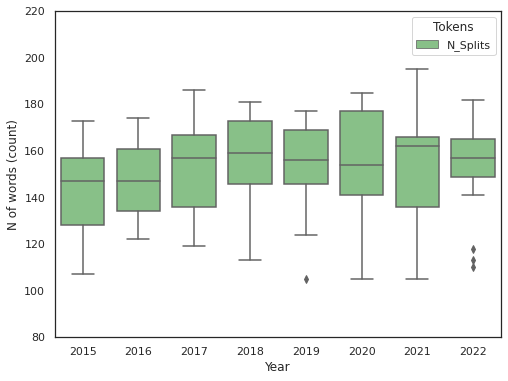

In [39]:
sns.set(rc={'figure.figsize':(8,6),"font.size":40,"axes.titlesize":140,"axes.labelsize":60},style="white") # font size doesn't work
# ax = sns.boxplot (y=df2)
# ax.set_ylim([0, 210])

sns.set_theme(style='white')
dd=pd.melt(df2,id_vars=['Year'],value_vars=['N_Splits'],var_name='Tokens')
ax = sns.boxplot(x='Year',y='value',data=dd,hue='Tokens',palette="Accent")
ax.set_ylim([80,220])
ax.set(xlabel='Year', ylabel='N of words (count)')
plt.savefig('boxplot_Nsplit.png')  

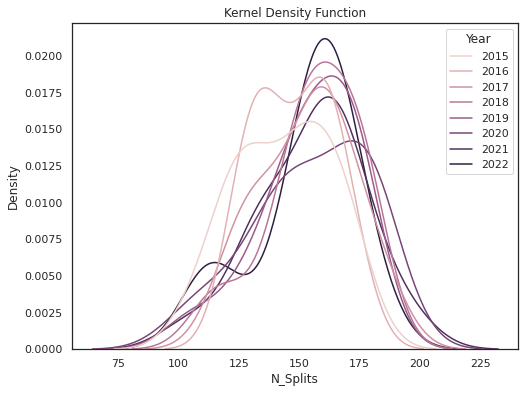

In [40]:
sns.kdeplot(x='N_Splits', data=df2, hue='Year', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_Nsplit.png')  

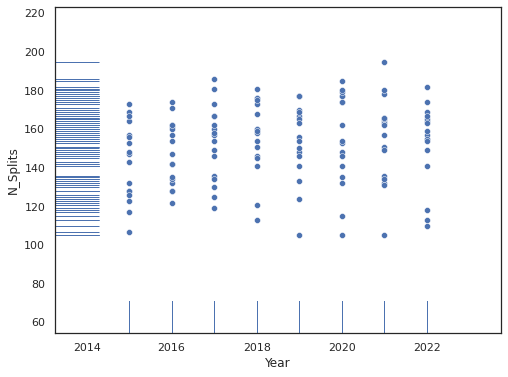

In [42]:
sns.scatterplot(data=df2, x="Year", y="N_Splits")
sns.rugplot(data=df2, x="Year", y="N_Splits", height=.1) 
plt.savefig('Rug_Nsplit.png')  

문항별 어휘수 및 문장수

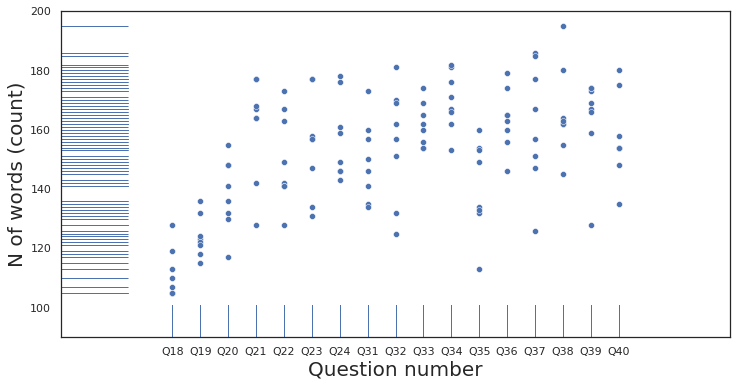

In [49]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df2, x="QN", y="N_Splits")
ax = sns.rugplot(data=df2, x="QN", y="N_Splits", height=.1) 
ax.set_ylim([90,200])
ax.set(xlabel='Question number', ylabel='N of words (count)')
plt.savefig('Rug_Nsplit_byQ.png')  

# Lexical Diversity analysis: select TTR, MassTTR, MTLD, HDD

In [50]:
df3 = df2
for col in df3.columns:
    print(col)

Year
Category
QN
Passage
String
Splits
N_Splits
Lemma
TTR
RTTR
LogTTR
MassTTR
MSTTR
MATTR
HDD
MTLD
MTLD_wrap
MTLD_bid
N_Sents


In [54]:
df3 = df2[['Year','QN','N_Splits','N_Sents','TTR','MATTR','HDD','MTLD']]
df3.head()

,Year,QN,N_Splits,N_Sents,TTR,MATTR,HDD,MTLD
0,2015,Q18,107,8,0.728972,0.794828,0.841506,110.542069
1,2015,Q19,123,10,0.666667,0.795405,0.824749,62.363391
2,2015,Q20,117,6,0.623932,0.758529,0.776571,53.164604
3,2015,Q21,128,6,0.703125,0.813165,0.848132,112.313725
4,2015,Q22,128,6,0.703125,0.813165,0.848132,112.313725


In [56]:
df3.groupby('Year')['MTLD'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,17.0,70.132748,23.188553,43.310215,53.164604,64.850195,83.004745,112.313725
2016,17.0,76.792884,23.264766,33.165609,61.406326,79.756780,90.865342,128.591868
2017,17.0,68.440139,16.220003,51.828086,54.530003,64.375632,76.120146,100.387122
2018,17.0,65.848274,18.339833,35.609356,57.055556,61.101336,77.132075,104.167293
2019,17.0,67.667011,22.549707,34.687500,53.672626,61.205022,83.649431,112.822093
2020,17.0,72.622156,22.232964,34.687500,55.366409,74.704918,84.541450,110.638889
2021,17.0,70.253735,15.130896,47.805145,57.070312,74.518367,82.715676,90.675093
2022,17.0,73.960848,24.221346,35.844810,63.181845,74.648523,87.299160,138.947368


In [82]:
df3['MTLD'].describe()

count    136.000000
mean      70.714724
std       20.633628
min       33.165609
25%       55.157307
50%       68.431332
75%       83.649431
max      138.947368
Name: MTLD, dtype: float64

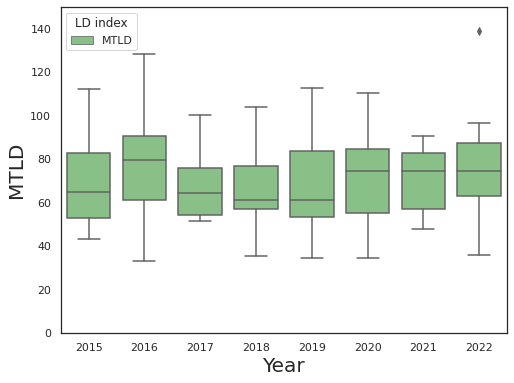

In [83]:
sns.set(rc={'figure.figsize':(8,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
# sns.set_theme(style='white')
dd=pd.melt(df3,id_vars=['Year'],value_vars=['MTLD'],var_name='LD index')
ax = sns.boxplot(x='Year',y='value',data=dd,hue='LD index',palette="Accent")
ax.set_ylim([0,150])
ax.set(xlabel='Year', ylabel='MTLD')
plt.savefig('boxplot_MTLD_by_year.png')  

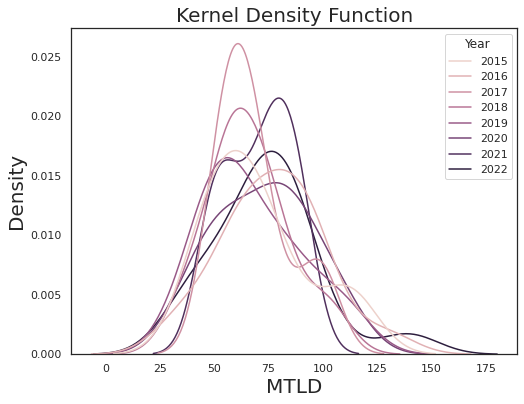

In [68]:
sns.kdeplot(x='MTLD', data=df3, hue='Year', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_MTLD.png')  

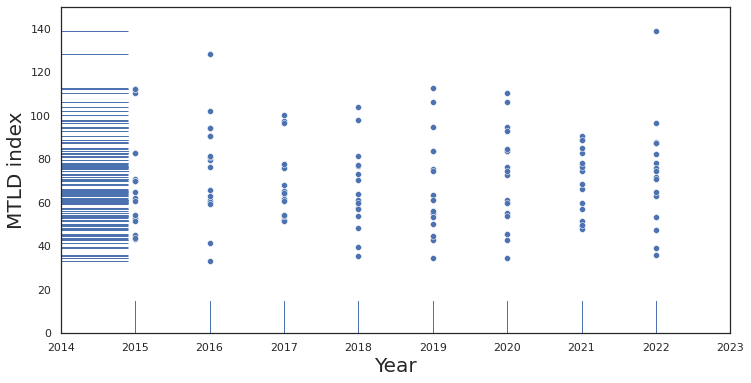

In [81]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df3, x="Year", y="MTLD")
ax = sns.rugplot(data=df3, x="Year", y="MTLD", height=.1) 
ax.set_ylim([0,150])
ax.set_xlim([2014,2023])
ax.set(xlabel='Year', ylabel='MTLD index')
plt.savefig('Rug_MTLD_byYear.png') 

MATTR

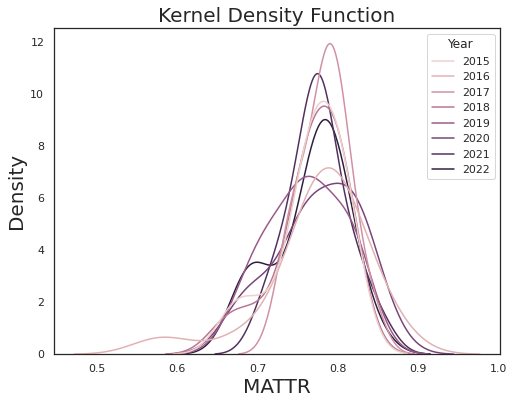

In [84]:
sns.kdeplot(x='MATTR', data=df3, hue='Year', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_MATTR.png')  

In [57]:
df3.groupby('Year')['MATTR'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,17.0,0.766036,0.042779,0.667755,0.755963,0.772696,0.795405,0.813165
2016,17.0,0.773909,0.064759,0.581905,0.755575,0.783291,0.808689,0.866111
2017,17.0,0.783982,0.030315,0.728142,0.768939,0.789333,0.802222,0.843504
2018,17.0,0.766674,0.043237,0.659032,0.753333,0.776147,0.799063,0.821569
2019,17.0,0.760403,0.046946,0.675960,0.719439,0.766786,0.805781,0.832034
2020,17.0,0.775653,0.051979,0.675960,0.749219,0.770909,0.818763,0.855200
2021,17.0,0.775449,0.036112,0.708547,0.750076,0.776852,0.782500,0.851600
2022,17.0,0.765262,0.045270,0.687068,0.749687,0.774182,0.794667,0.837838


# [2] Readability

## install packages

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import os
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

!pip install textstat
import textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Readability indices & Plotting for papers

In [ ]:
from typing import TextIO
FRE = []
FKG = []
GF = []
ARI = []
CLI = []
LWF = []
DCRS = []
TS = []

for i in range(0, len(df2['Passage'])):
  text = df2['Passage'][i]
  fre = textstat.flesch_reading_ease(text)
  fkg = textstat.flesch_kincaid_grade(text)
  gf = textstat.gunning_fog(text)
  ari = textstat.automated_readability_index(text)
  cli = textstat.coleman_liau_index(text)
  lwf = textstat.linsear_write_formula(text)
  dcrs = textstat.dale_chall_readability_score(text)
  ts = textstat.text_standard(text)

  FRE.append(fre)
  FKG.append(fkg)
  GF.append(gf)
  ARI.append(ari)
  CLI.append(cli)
  LWF.append(lwf)
  DCRS.append(dcrs)
  TS.append(ts)


df3['FRE'] = FRE
df3['FKG'] = FKG
df3['GF'] = GF
df3['ARI'] = ARI
df3['CLI'] = CLI
df3['LWF'] = LWF
df3['DCRS'] = DCRS
df3['TS'] = TS


df3: LD(4 indices)  + Readability

In [91]:
df3.to_csv('results_all_1005.csv')

In [92]:
df3.head()

,Year,QN,N_Splits,N_Sents,TTR,MATTR,HDD,MTLD,FRE,FKG,GF,ARI,CLI,LWF,DCRS,TS
0,2015,Q18,107,8,0.728972,0.794828,0.841506,110.542069,74.79,6.2,8.72,8.5,10.03,6.750000,8.73,8th and 9th grade
1,2015,Q19,123,10,0.666667,0.795405,0.824749,62.363391,84.37,4.5,6.87,4.1,4.80,7.428571,6.94,4th and 5th grade
2,2015,Q20,117,6,0.623932,0.758529,0.776571,53.164604,51.68,10.9,13.95,12.4,11.95,10.833333,9.60,10th and 11th grade
3,2015,Q21,128,6,0.703125,0.813165,0.848132,112.313725,66.78,9.2,12.90,11.2,9.11,12.200000,8.89,8th and 9th grade
4,2015,Q22,128,6,0.703125,0.813165,0.848132,112.313725,66.78,9.2,12.90,11.2,9.11,12.200000,8.89,8th and 9th grade


In [131]:
df4 = df3
df4 = df4[['Year','QN','N_Splits','N_Sents','TTR','MTLD','FRE','FKG','GF']]

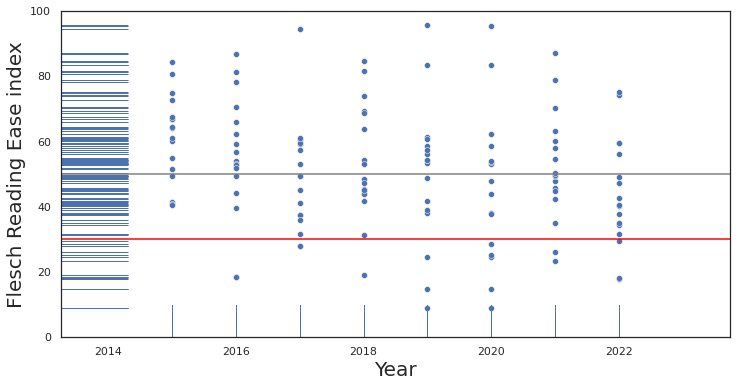

In [112]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Year", y="FRE")
ax = sns.rugplot(data=df4, x="Year", y="FRE", height=.1) 
ax.set_ylim([0,100])
# ax.set_xlim([2014,2023])
ax.set(xlabel='Year', ylabel='Flesch Reading Ease index')
ax.axhline(50, color="gray")
ax.axhline(30, color="red")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('Rug_FRE_byYear.png') 

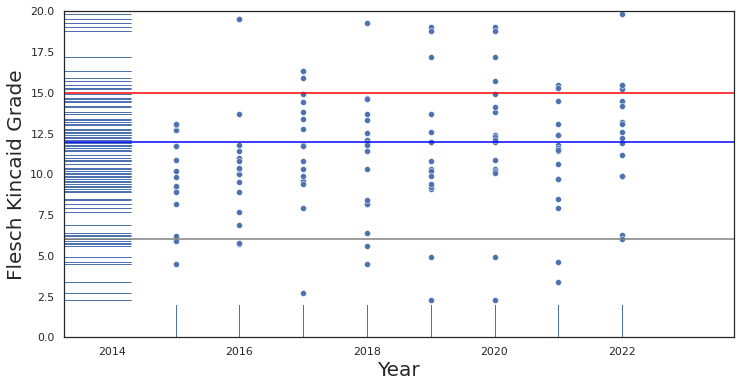

In [117]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Year", y="FKG")
ax = sns.rugplot(data=df4, x="Year", y="FKG", height=.1) 
ax.set_ylim([0,20])
# ax.set_xlim([2014,2023])
ax.set(xlabel='Year', ylabel='Flesch Kincaid Grade')
ax.axhline(15, color="red")
ax.axhline(12, color="blue")
ax.axhline(6, color="gray")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('Rug_FKG_byYear.png') 

In [120]:
a = df4.groupby('Year')['FKG'].describe()
a.to_csv('FKG_summary_by_Year.csv')

In [121]:
b = df4.groupby('Year')['FRE'].describe()
b.to_csv('FRE_summary_by_Year.csv')

In [123]:
b1 = df4.describe()
b1.to_csv('Readability_summary_total.csv')


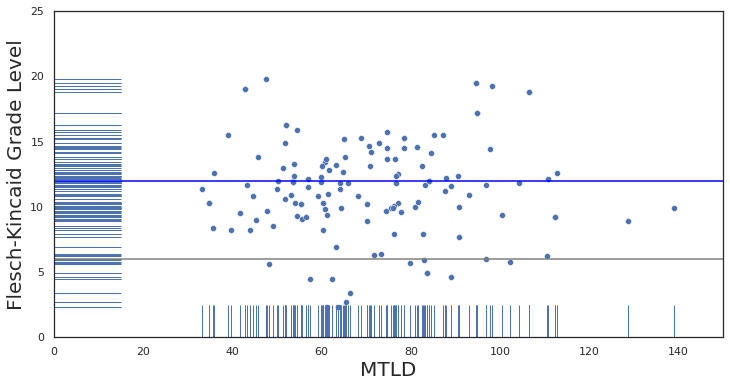

In [130]:
c

The Gunning Fog index: It generates a grade level between 0 and 20. It estimates the education level required to understand the text.
Too many different words per thoughsand, not enough simple sentences, too difficult for the inteded audience.

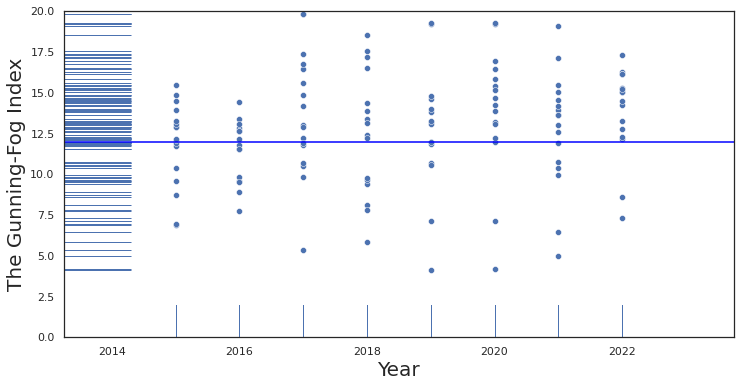

In [137]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Year", y="GF")
ax = sns.rugplot(data=df4, x="Year", y="GF", height=.1) 
ax.set_ylim([0,20])
# ax.set_xlim([0,150])
ax.set(xlabel='Year', ylabel='The Gunning-Fog Index')
# ax.axhline(15, color="red")=
ax.axhline(12, color="blue")
# ax.axhline(6, color="gray")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('GF_scatter.png') 

========================================================

In [22]:
ordered_ttr = list(df2['TTR']).sort()
ordered_ttr

In [ ]:
a1 = df2[['N_Splits','TTR','MSTTR']]
a2 = a1.sort_values(by=['N_Splits'])
a2

In [24]:
df3 = df2.sort_values(by=['N_Splits'])

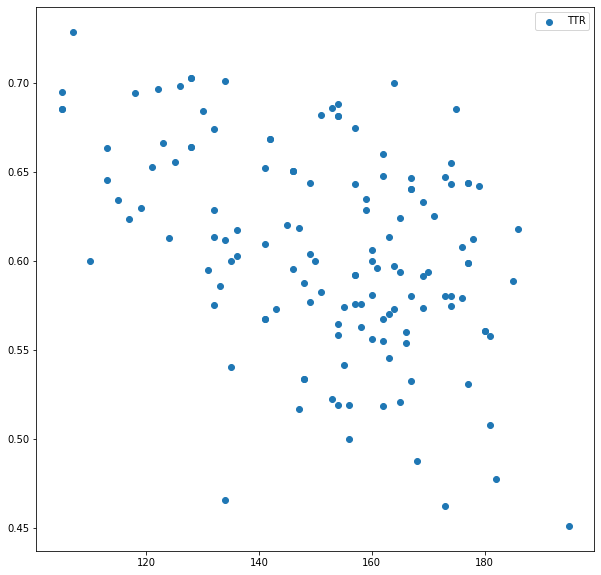

In [25]:
f = plt.figure(figsize=(10, 10))
plt.scatter(df2['N_Splits'],df2['TTR'],  label='TTR')
# plt.scatter(df2['N_Splits'],df2['LogTTR'],  label='LogTTR')
# plt.scatter(df2['N_Splits'],df2['MSTTR'],  label='MSTTR')
plt.legend()

### Linear regression of TTR and Length

In [26]:
# importing the required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

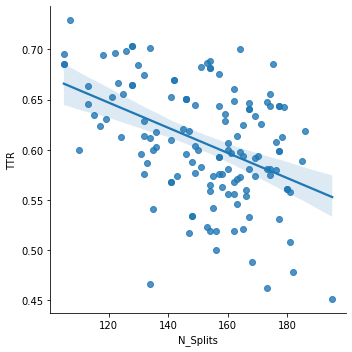

In [29]:
# # f = plt.figure(figsize=(10, 10))
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# data
df = df2
 
# scatter plot with regression
# line(by default)
sns.lmplot(x ='N_Splits', y ='TTR', data = df)
 
# Show the plot
plt.show()

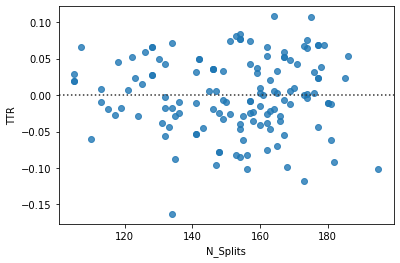

In [30]:
# Residual plots
sns.residplot(x ='N_Splits', y ='TTR', data = df)

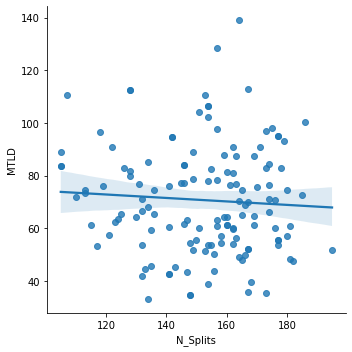

In [31]:
sns.lmplot(x ='N_Splits', y ='MTLD', data = df)
 
# Show the plot
plt.show()

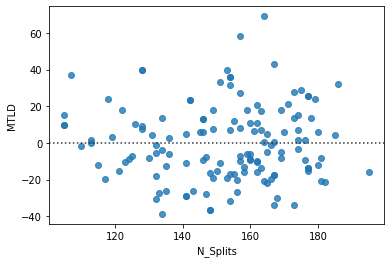

In [32]:
# Residual plots
sns.residplot(x ='N_Splits', y ='MTLD', data = df)

In [34]:
import statsmodels.api as sm

X = df["N_Splits"]
y = df["TTR"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    TTR   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              3551.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):                    7.91e-99
Time:                        16:02:05   Log-Likelihood:                          99.282
No. Observations:                 136   AIC:                                     -196.6
Df Residuals:                     135   BIC:                                     -193.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
N_Splits       0.0039   6.54e-05     59.591      0.000       0.004       0.004
==============================================================================
Omnibus:                        2.718   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                2.674
Skew:                           0.338   Prob(JB):                        0.263
Kurtosis:                       2.874   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X = df["N_Splits"]
y = df["MTLD"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MTLD   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1239.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):                    6.93e-70
Time:                        16:02:10   Log-Likelihood:                         -619.89
No. Observations:                 136   AIC:                                      1242.
Df Residuals:                     135   BIC:                                      1245.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
N_Splits       0.4555      0.013     35.200      0.000       0.430       0.481
==============================================================================
Omnibus:                        4.854   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.949
Skew:                           0.450   Prob(JB):                       0.0842
Kurtosis:                       2.749   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Style: additionaal Boxplots

In [49]:
import seaborn as sns
import numpy as np

### Setting the figure size

In [62]:
sns.set(rc={'figure.figsize':(12,8)}) #set width and height

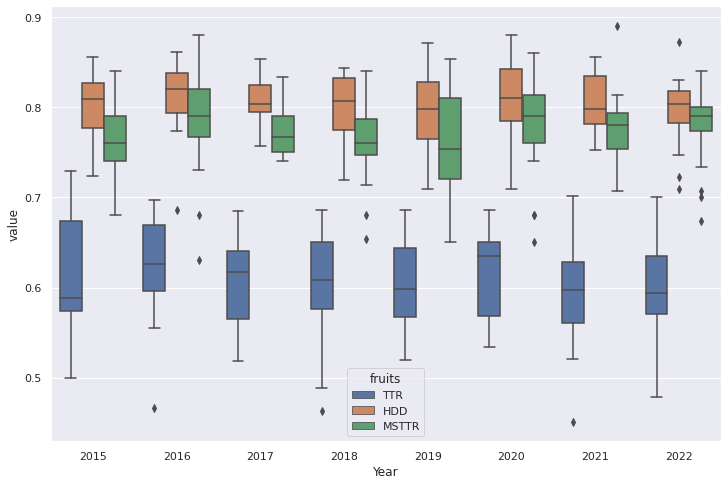

In [63]:
df = df2
df = df[['Year','TTR','MSTTR','HDD','MTLD']]

dd=pd.melt(df,id_vars=['Year'],value_vars=['TTR','HDD','MSTTR'],var_name='fruits')
sns.boxplot(x='Year',y='value',data=dd,hue='fruits')

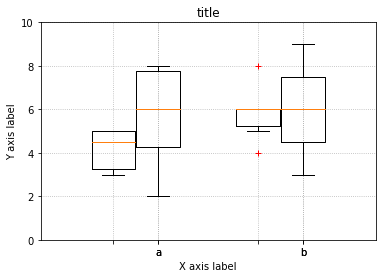

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# --- Your data, e.g. results per algorithm:
data1 = [5,5,4,3,3,5]
data2 = [6,6,4,6,8,5]
data3 = [7,8,4,5,8,2]
data4 = [6,9,3,6,8,4]

# --- Combining your data:
data_group1 = [data1, data2]
data_group2 = [data3, data4]

# --- Labels for your data:
labels_list = ['a','b']
xlocations  = range(len(data_group1))
width       = 0.3
symbol      = 'r+'
ymin        = 0
ymax        = 10

ax = plt.gca()
ax.set_ylim(ymin,ymax)
ax.set_xticklabels( labels_list, rotation=0 )
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)
ax.set_xticks(xlocations)
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('title')

# --- Offset the positions per group:
positions_group1 = [x-(width+0.01) for x in xlocations]
positions_group2 = xlocations

plt.boxplot(data_group1, 
            sym=symbol,
            labels=['']*len(labels_list),
            positions=positions_group1, 
            widths=width, 
#           notch=False,  
#           vert=True, 
#           whis=1.5,
#           bootstrap=None, 
#           usermedians=None, 
#           conf_intervals=None,
#           patch_artist=False,
            )

plt.boxplot(data_group2, 
            labels=labels_list,
            sym=symbol,
            positions=positions_group2, 
            widths=width, 
#           notch=False,  
#           vert=True, 
#           whis=1.5,
#           bootstrap=None, 
#           usermedians=None, 
#           conf_intervals=None,
#           patch_artist=False,
            )

plt.savefig('boxplot_grouped.png')  
plt.savefig('boxplot_grouped.pdf')    # when publishing, use high quality PDFs
#plt.show()                   # uncomment to show the plot. 

In [53]:
dd = pd.melt(df3, id_vars = 'Year'],value_vars = ['TTR','HDD'],var_name='LD')
sns.boxplot(x = 'Year', y = 'LD index', data=dd, hue='LD')

SyntaxError: ignored

### MTLD grouped plots

In [38]:
datatop = df2.tail()
datatop

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma,TTR,RTTR,...,FDTTR,MATTR,HDD,MTLD,BILOG,MA,MassTTR,MSTTR,MTLD_wrap,MTLD_bid
131,2022,Infer-Logic,Q36,"According to the market response model, it is ...",1035,"[According, to, the, market, response, model,,...",163,"[accord, to, the, market, response, model, it,...",0.570552,7.284322,...,0.813333,0.810877,0.803874,87.560227,79.687117,78.402729,0.049799,0.813333,79.687117,78.402729
132,2022,Infer-Logic,Q37,In spite of the likeness between the fictional...,1025,"[In, spite, of, the, likeness, between, the, f...",167,"[in, spite, of, the, likeness, between, the, f...",0.532934,6.887027,...,0.673333,0.690678,0.746895,35.844810,36.263473,35.668548,0.055324,0.673333,36.263473,35.668548
133,2022,Infer-Logic,Q38,Retraining current employees for new positions...,981,"[Retraining, current, employees, for, new, pos...",155,"[retraining, current, employee, for, new, posi...",0.574194,7.148652,...,0.793333,0.783962,0.804126,82.405437,73.432258,64.910794,0.050222,0.793333,73.432258,64.910794
134,2022,Infer-Logic,Q39,As long as the irrealism of the silent black a...,1068,"[As, long, as, the, irrealism, of, the, silent...",174,"[as, long, as, the, irrealism, of, the, silent...",0.574713,7.580980,...,0.773333,0.792000,0.797267,71.008388,69.804598,68.444683,0.047918,0.773333,69.804598,68.444683
135,2022,Context,Q40,Philip Kitcher and Wesley Salmon have suggeste...,1069,"[Philip, Kitcher, and, Wesley, Salmon, have, s...",154,"[philip, kitcher, and, wesley, salmon, have, s...",0.519481,6.446584,...,0.706667,0.688381,0.708912,39.029817,38.831169,34.360697,0.059439,0.706667,38.831169,34.360697


column names

In [ ]:
for col in df2.columns:
    print(col)

Year
Category
QN
Passage
String
Splits
N_Splits
Lemma
TTR
RTTR
LogTTR
MSTTR
FDTTR
MATTR
HDD
MTLD
BILOG
MA


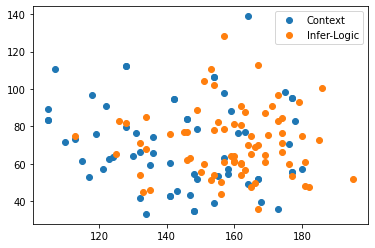

In [37]:
groups = df2.groupby("Category")
for name, group in groups:
    plt.plot(group["N_Splits"], group["MTLD"], marker="o", linestyle="", label=name)
plt.legend()

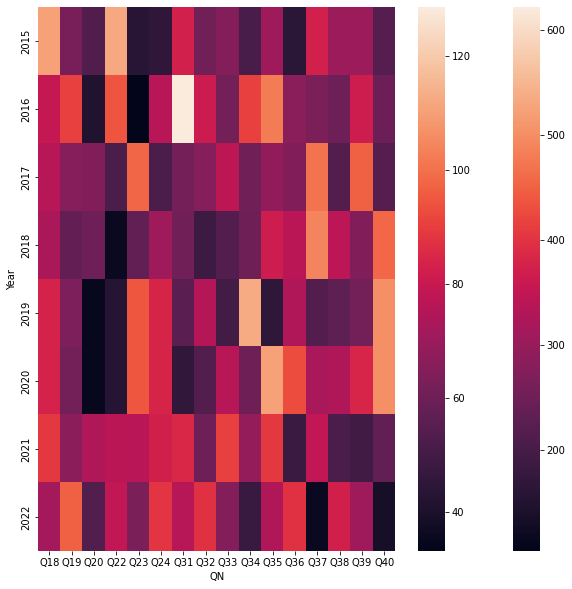

In [ ]:
f = plt.figure(figsize=(10, 10))
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

data = df2
data = data.pivot("Year", "QN", "MTLD")
ax = sns.heatmap(data)

In [ ]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


In [ ]:
df3

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG,MA
51,2019,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",578,"[Dear, Mr., Reese,, A, few, days, ago,, I, sub...",105,"[dear, mr, reese, a, few, day, ago, i, submit,...",0.685714,7.026481,0.918931,0.040110,0.810,0.766786,0.810360,83.649431,76.466667,62.060588
34,2020,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",578,"[Dear, Mr., Reese,, A, few, days, ago,, I, sub...",105,"[dear, mr, reese, a, few, day, ago, i, submit,...",0.685714,7.026481,0.918931,0.040110,0.810,0.766786,0.810360,83.649431,76.466667,62.060588
17,2021,Context,Q18,"Dear Friends,\nSeason_s greetings. As some of ...",611,"[Dear, Friends,, Season_s, greetings., As, som...",105,"[dear, friend, season, greeting, as, some, of,...",0.695238,7.124071,0.921894,0.038643,0.790,0.782500,0.836292,89.071602,75.857143,52.282982
119,2015,Context,Q18,One difference between winners and losers is h...,635,"[One, difference, between, winners, and, loser...",107,"[one, difference, between, winner, and, loser,...",0.728972,7.540545,0.932349,0.033336,0.790,0.794828,0.841506,110.542069,107.811321,0.000000
0,2022,Context,Q18,"Dear Ms. Green,\nMy name is Donna Williams, a ...",637,"[Dear, Ms., Green,, My, name, is, Donna, Willi...",110,"[dear, ms, green, my, name, be, donna, william...",0.600000,6.292853,0.891325,0.053236,0.790,0.763279,0.782583,71.694409,63.127273,57.933236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2019,Context,Q41,"Industrial capitalism not only created work, i...",1608,"[Industrial, capitalism, not, only, created, w...",254,"[industrial, capitalism, not, only, create, wo...",0.559055,8.909872,0.894984,0.043669,0.796,0.789366,0.822339,79.721184,84.039370,74.195627
7,2022,Context,Q41,Classifying things together into groups is som...,1429,"[Classifying, things, together, into, groups, ...",254,"[classify, thing, together, into, group, be, s...",0.531496,8.470653,0.885855,0.047465,0.756,0.742439,0.783105,58.513907,59.295276,53.015209
41,2020,Context,Q41,"Industrial capitalism not only created work, i...",1608,"[Industrial, capitalism, not, only, created, w...",254,"[industrial, capitalism, not, only, create, wo...",0.559055,8.909872,0.894984,0.043669,0.796,0.789366,0.822339,79.721184,84.039370,74.195627
126,2015,Context,Q41,Increased size affects group life in a number ...,1540,"[Increased, size, affects, group, life, in, a,...",257,"[increase, size, affect, group, life, in, a, n...",0.494163,7.922042,0.872972,0.052710,0.752,0.758558,0.786371,59.559458,57.607004,56.914059


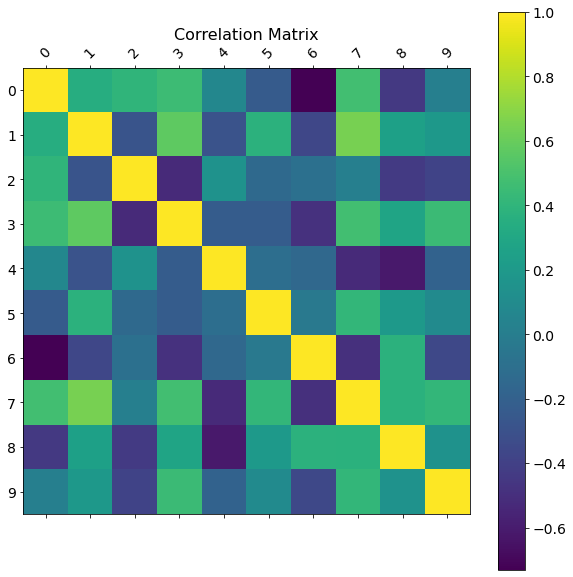

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442
1,0.791725,0.528895,0.568045,0.925597,0.071036,0.087129,0.020218,0.832620,0.778157,0.870012
2,0.978618,0.799159,0.461479,0.780529,0.118274,0.639921,0.143353,0.944669,0.521848,0.414662
3,0.264556,0.774234,0.456150,0.568434,0.018790,0.617635,0.612096,0.616934,0.943748,0.681820
4,0.359508,0.437032,0.697631,0.060225,0.666767,0.670638,0.210383,0.128926,0.315428,0.363711
5,0.570197,0.438602,0.988374,0.102045,0.208877,0.161310,0.653108,0.253292,0.466311,0.244426
6,0.158970,0.110375,0.656330,0.138183,0.196582,0.368725,0.820993,0.097101,0.837945,0.096098
7,0.976459,0.468651,0.976761,0.604846,0.739264,0.039188,0.282807,0.120197,0.296140,0.118728
8,0.317983,0.414263,0.064147,0.692472,0.566601,0.265389,0.523248,0.093941,0.575946,0.929296
9,0.318569,0.667410,0.131798,0.716327,0.289406,0.183191,0.586513,0.020108,0.828940,0.004695


In [ ]:
# df4 = df3.iloc[:, [6,8,9,10,11,12,13,14,15,16,17]]

In [ ]:
# import seaborn as sns; sns.set_theme()